In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 3E9D-5BFC

 Directory of C:\Users\lohit\OneDrive\Project xlr

05-12-2023  11:52    <DIR>          .
05-12-2023  11:44    <DIR>          ..
05-12-2023  11:48    <DIR>          .ipynb_checkpoints
01-12-2023  14:48             7,259 bankruptcy-prevention.csv
05-12-2023  11:50               820 pro 1.ipynb
               2 File(s)          8,079 bytes
               3 Dir(s)  83,830,300,672 bytes free


In [3]:
df = pd.read_csv('bankruptcy-prevention.csv')

In [4]:
df.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy


In [7]:
df[['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']] = df['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)


In [8]:
df.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5;1;0;0;0;0.5;bankruptcy,0.5,1,0,0,0,0.5,bankruptcy
1,0;1;0;0;0;1;bankruptcy,0,1,0,0,0,1,bankruptcy
2,1;0;0;0;0;1;bankruptcy,1,0,0,0,0,1,bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy,0.5,0,0,0.5,0,1,bankruptcy
4,1;1;0;0;0;1;bankruptcy,1,1,0,0,0,1,bankruptcy


In [9]:
del df['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class']

In [11]:
df.head(1)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy


In [12]:
df.shape

(250, 7)

In [13]:
df.dtypes

industrial_risk          object
management_risk          object
financial_flexibility    object
credibility              object
competitiveness          object
operating_risk           object
class                    object
dtype: object

In [14]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [17]:
columns=['industrial_risk', 'management_risk', 'financial_flexibility','credibility', 'competitiveness', 'operating_risk']

for i in columns:
    df[i]=df[i].astype(float)

In [18]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object


# Explorative Data Analysis 

In [21]:
df.isna().any()

industrial_risk          False
management_risk          False
financial_flexibility    False
credibility              False
competitiveness          False
operating_risk           False
class                    False
dtype: bool

In [22]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [24]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

<Axes: xlabel='class'>

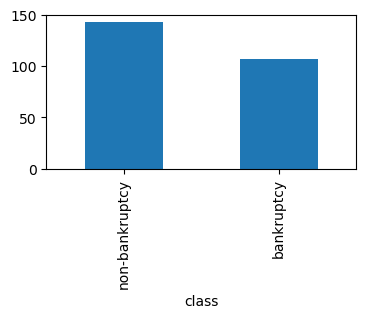

In [28]:
plt.figure(figsize=(4,2))
df['class'].value_counts().plot(kind='bar')

<Axes: >

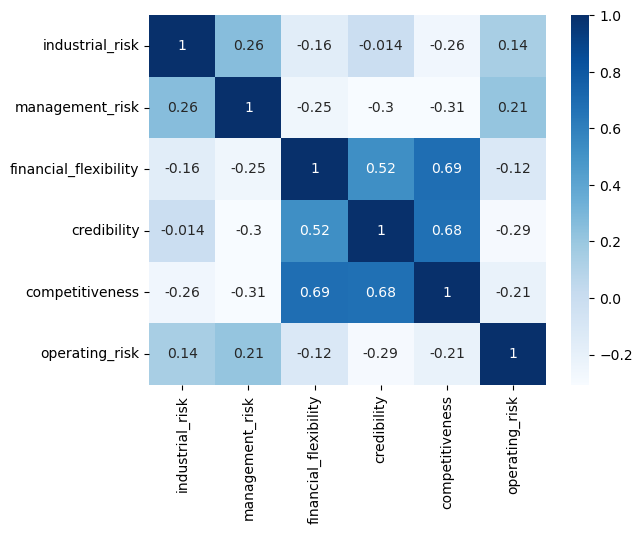

In [32]:
import seaborn as sns
sns.heatmap(df.iloc[:,:-1].corr(),annot=True, cmap= 'Blues')

In [34]:
for i in columns:
    
    print(df[i].value_counts())
    print('---'*20)

industrial_risk
1.0    89
0.5    81
0.0    80
Name: count, dtype: int64
------------------------------------------------------------
management_risk
1.0    119
0.5     69
0.0     62
Name: count, dtype: int64
------------------------------------------------------------
financial_flexibility
0.0    119
0.5     74
1.0     57
Name: count, dtype: int64
------------------------------------------------------------
credibility
0.0    94
1.0    79
0.5    77
Name: count, dtype: int64
------------------------------------------------------------
competitiveness
0.0    103
1.0     91
0.5     56
Name: count, dtype: int64
------------------------------------------------------------
operating_risk
1.0    114
0.0     79
0.5     57
Name: count, dtype: int64
------------------------------------------------------------


C:\Users\lohit\anakonda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


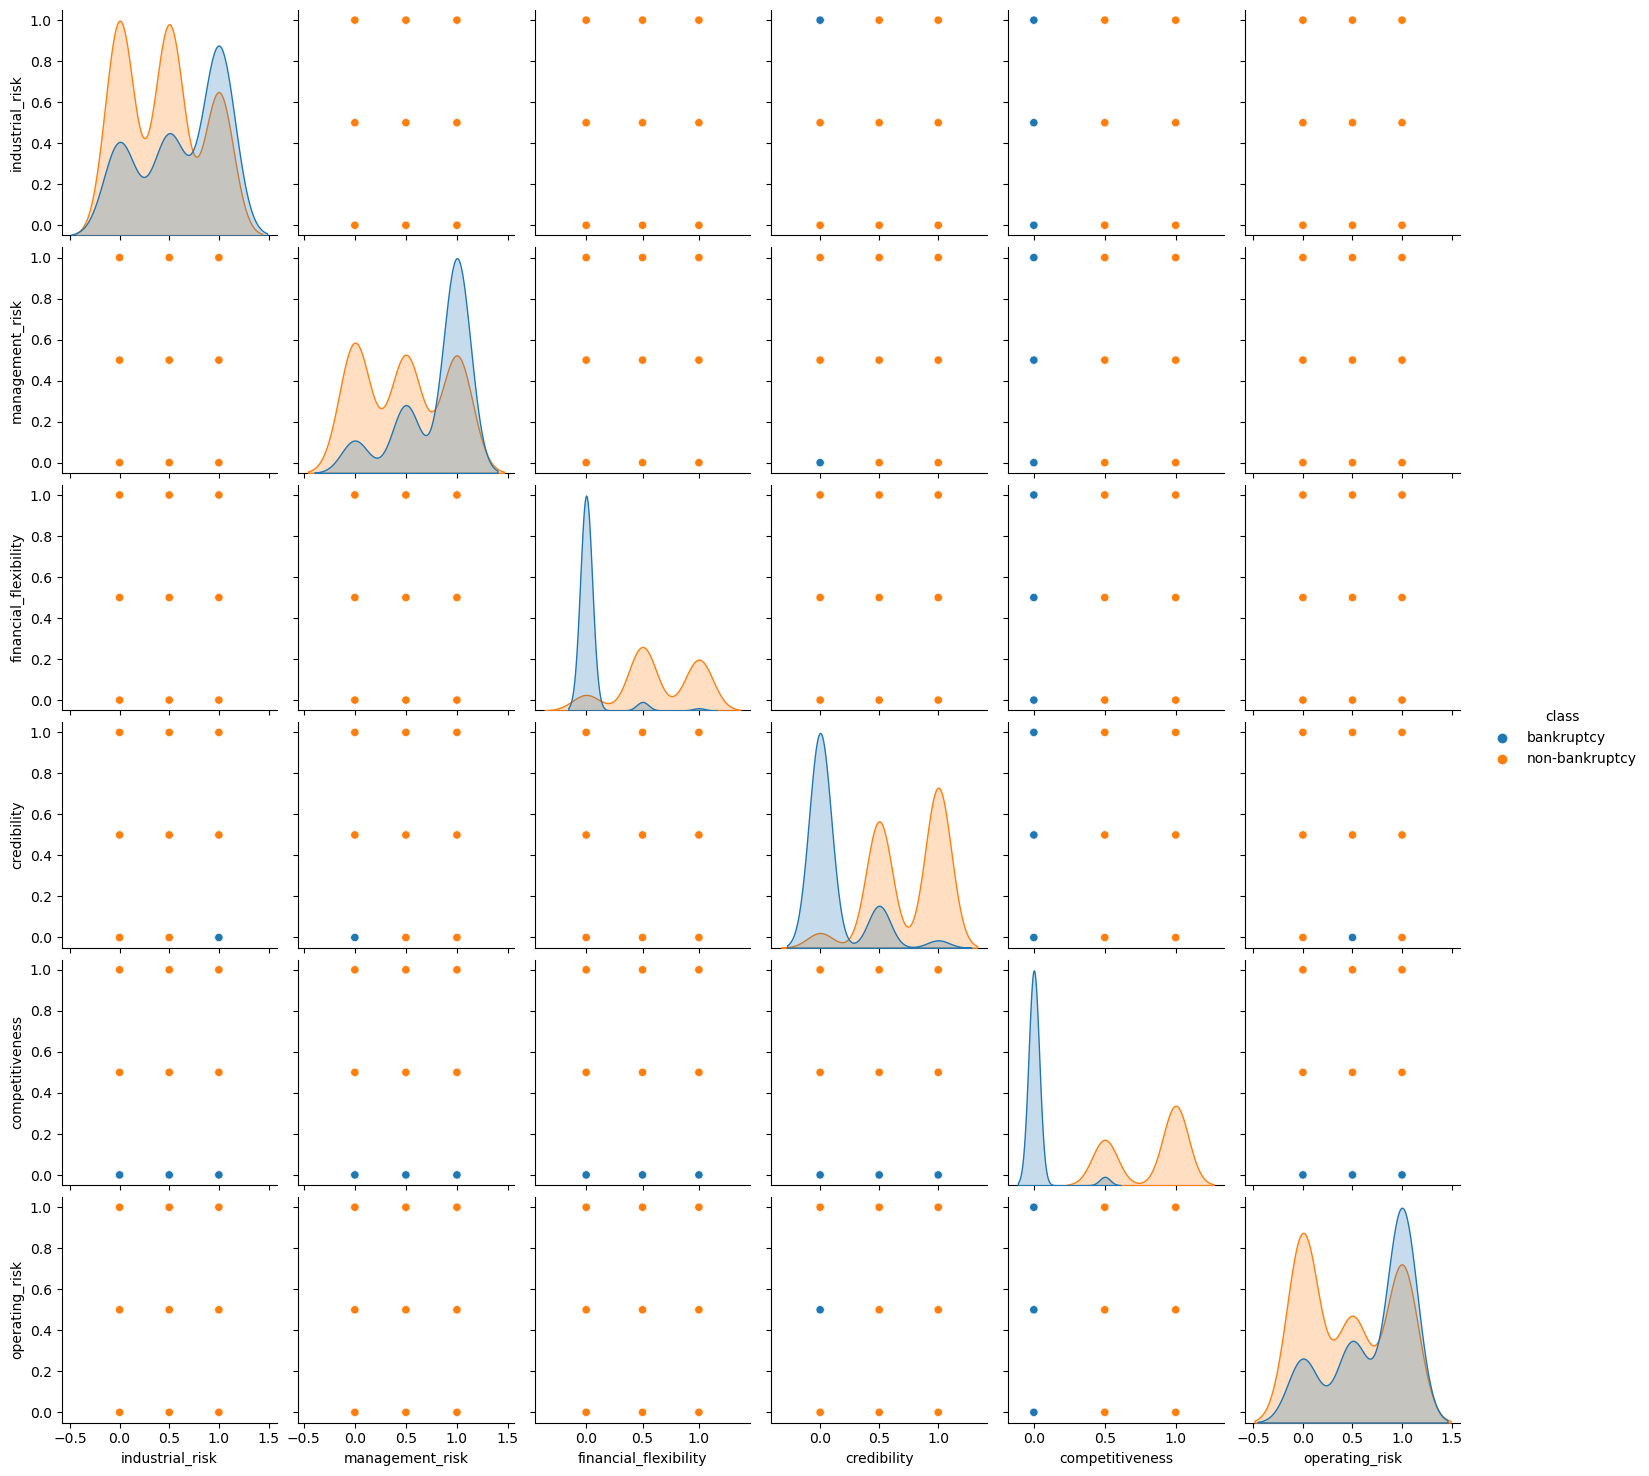

In [35]:
sns.pairplot(data=df,hue='class')

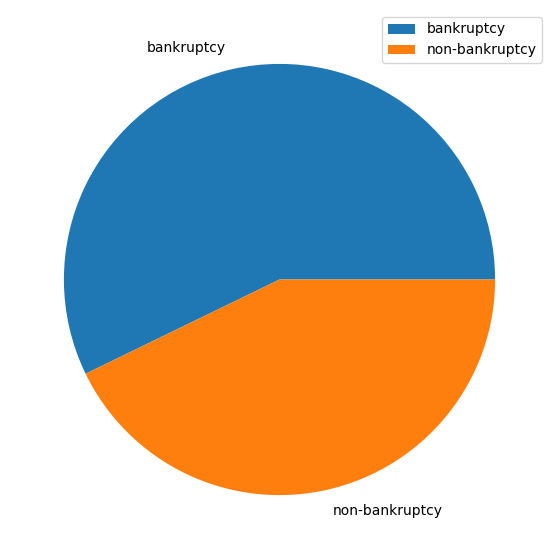

In [39]:
plt.figure(figsize=(13,7))
plt.pie(df['class'].value_counts(), labels=df['class'].unique())
plt.legend(loc='upper right');

In [51]:
df['class'].replace({'bankruptcy':1, 'non-bankruptcy':0},inplace=True)

In [52]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


# model selection and validation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [56]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [61]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=21)

In [62]:
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [63]:
Yt = model.predict(x_test)
print(classification_report(Yt,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [70]:
model = [DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=10),RandomForestClassifier(n_estimators=200,max_samples=0.8),BaggingClassifier(n_estimators=200,max_samples=0.8)]

In [77]:
for i in model:
    print(i)
    print('   '*10)
    i.fit(x_train,y_train)
    Yt= i.predict(x_test)
    print(classification_report(Yt,y_test))
    print('----'*15)
   

DecisionTreeClassifier(max_depth=10, min_samples_split=5)
                              
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

------------------------------------------------------------
RandomForestClassifier(max_samples=0.8, n_estimators=200)
                              
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

------------------------------------------------------------
BaggingClassifier(max_samples=0.8, n_estimator

In [78]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
Yt = model.predict(x_test)


In [80]:
from sklearn import tree

In [84]:
columns=['industrial_risk', 'management_risk', 'financial_flexibility','credibility', 'competitiveness', 'operating_risk']

fn = columns
cn = ['0','1']


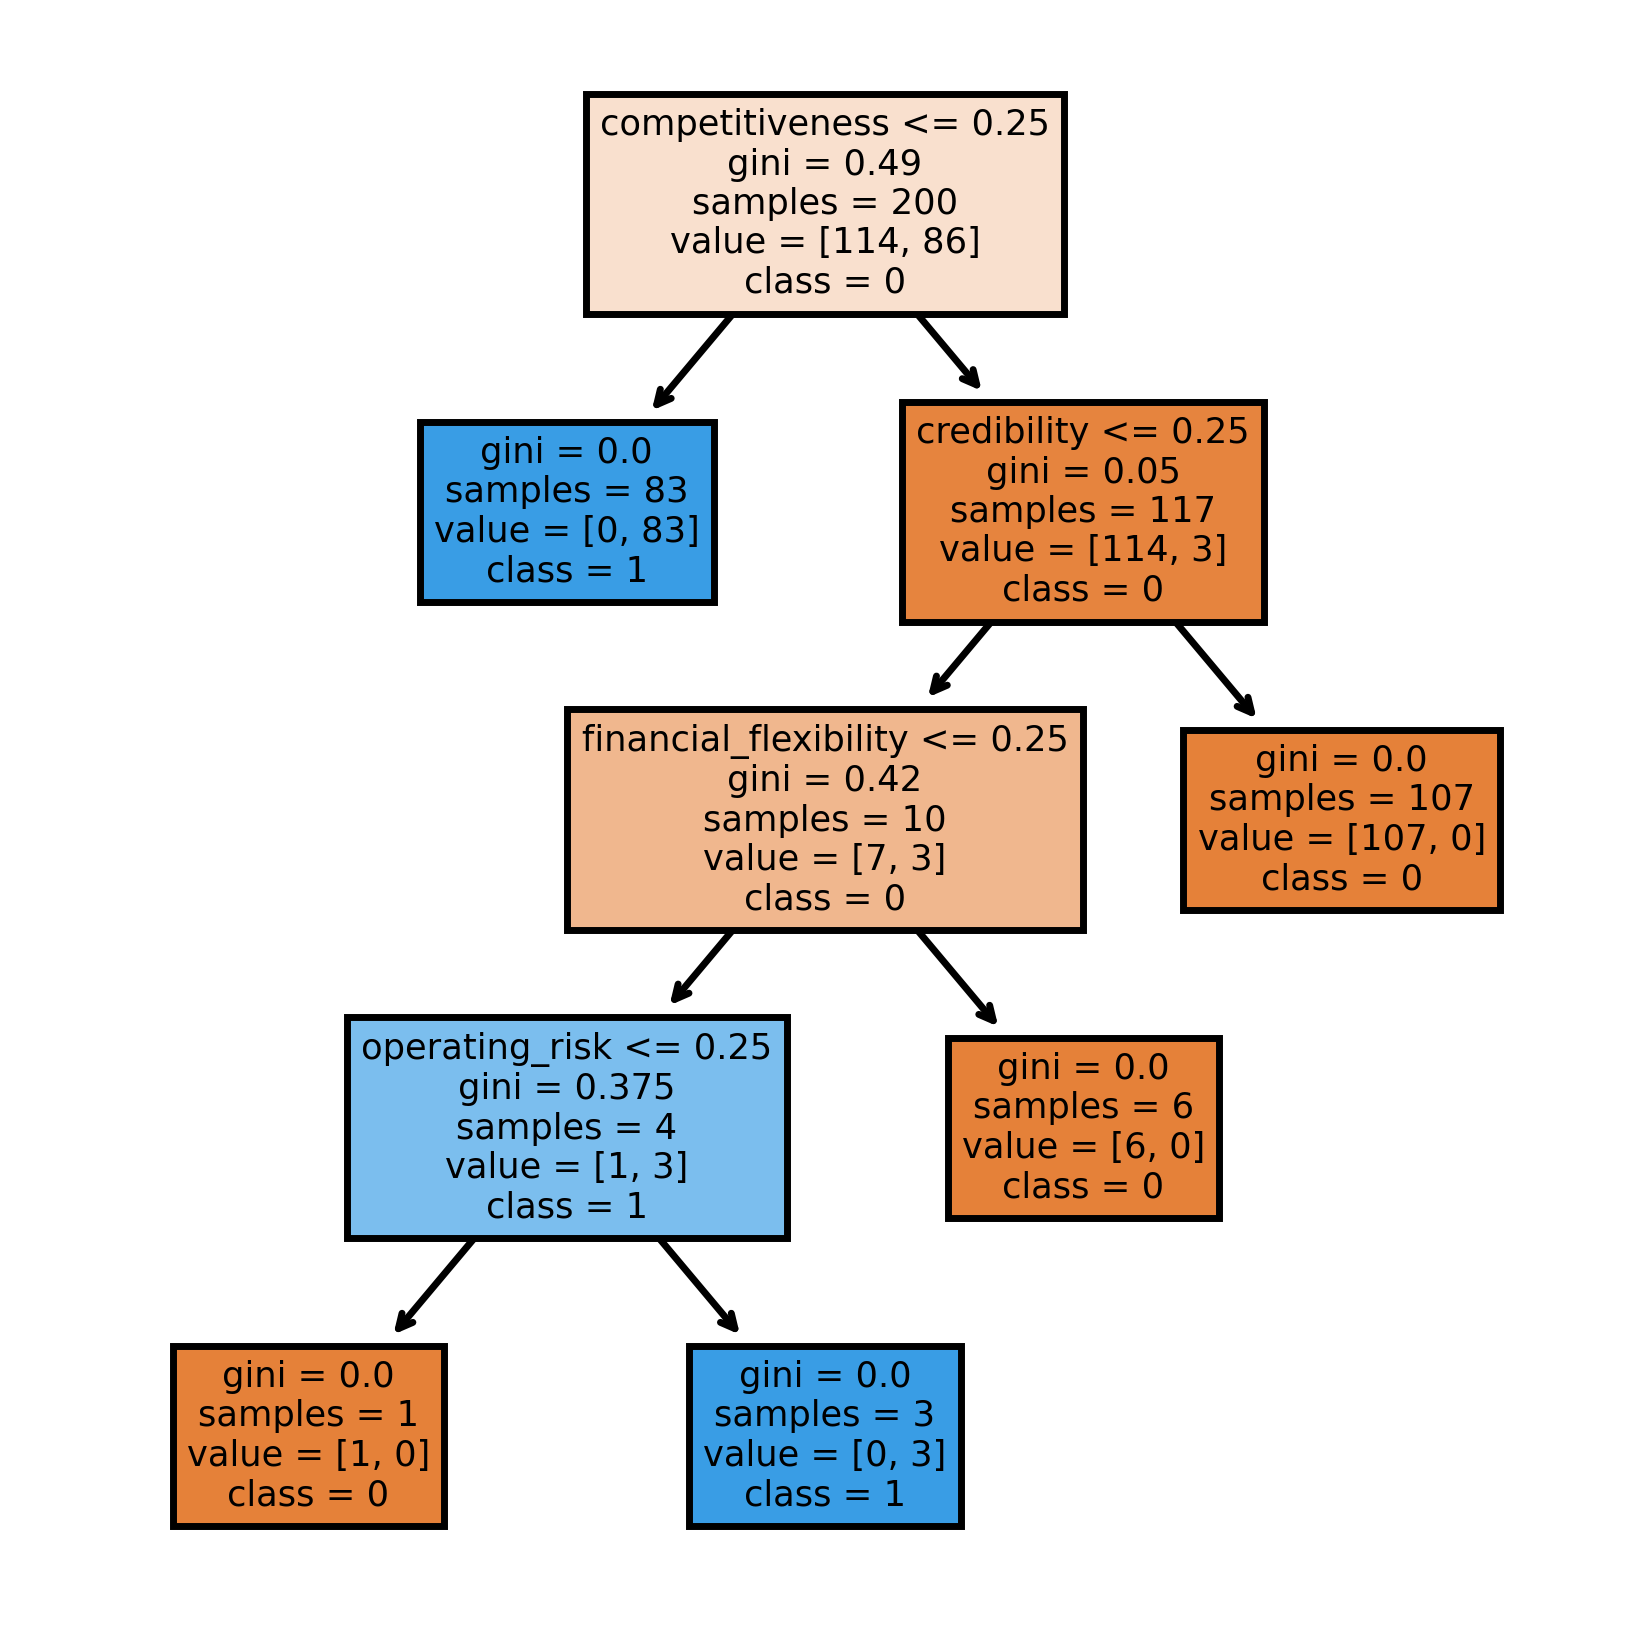

In [85]:

plt.subplots(figsize=(4,4),dpi = 500)
tree.plot_tree(model,feature_names = fn,
               class_names=cn,
               filled=True);